# DATA ANALYSIS

## 1. Ý nghĩa của thuộc tính:
- **Country**: Tên quốc gia
- Total Cases: Tổng số ca nhiễm
- New Cases: Số ca nhiễm mới
- Total Deaths: Tổng số ca tử vong
- New Deaths: Số ca tử vong mới
- Total Recovered: Tổng số ca hồi phục
- New Recovered: Số ca hồi phục mới
- Active Cases: Tổng số ca đang điều trị
- Serious, Critical: Số ca nghiêm trọng, nguy kịch
- Tot Cases/1M pop: Số ca nhiễm trên 1 triệu dân
- Deaths/1M pop: Số ca tử vong trên 1 triệu dân
- Total tests: Tổng số lần test
- Tests/1M pop: Số lần test trên 1 triệu dân
- Population: Dân số
- Continent: Châu lục
- 1 Case every X ppl: 1 ca nhiễm trên X dân
- 1 Death every X ppl: 1 ca tử vong trên X dân
- 1 Test every X ppl: 1 lần test trên X dân
- New Cases/1M pop: Số ca nhiễm mới trên 1 triệu dân
- New Deaths/1M pop: Số ca tử vong mới trên 1 triệu dân
- Active Cases/1M pop: Số ca đang điều trị trên 1 triệu dân

## 2. Phân tích các mối quan hệ nhờ trực quan

In [2]:
# Import thư viện: 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np

In [3]:
# Đọc dữ liệu:
covid_df = pd.read_csv('../data/modified/Modified_March_06_2023_corona_data.csv')
covid_df.head(5)

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/1M pop,...,Total tests,Tests/1M pop,Population,Continent,1 Case every X ppl,1 Death every X ppl,1 Test every X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,USA,105396817.0,0.0,1146740.0,0.0,102864696.0,0.0,1385381.0,2726.0,314800.0,...,1.167686e+09,3487657.0,3.348053e+08,North America,3.0,292.0,0.0,0.0,0.0,4138.0
1,India,44688101.0,0.0,530775.0,0.0,44154425.0,0.0,2901.0,0.0,31770.0,...,9.191891e+08,653468.0,1.406632e+09,Asia,31.0,2650.0,2.0,0.0,0.0,2.0
2,France,39638159.0,0.0,165030.0,0.0,39400459.0,706.0,72670.0,869.0,604383.0,...,2.714902e+08,4139547.0,6.558452e+07,Europe,2.0,397.0,0.0,0.0,0.0,1108.0
3,Germany,38210850.0,0.0,168397.0,0.0,37767300.0,17500.0,275153.0,0.0,455522.0,...,1.223324e+08,1458359.0,8.388360e+07,Europe,2.0,498.0,1.0,0.0,0.0,3280.0
4,Brazil,37076053.0,0.0,699276.0,0.0,36249161.0,0.0,127616.0,0.0,172164.0,...,6.377617e+07,296146.0,2.153536e+08,South America,6.0,308.0,3.0,0.0,0.0,593.0


In [4]:
# Define the custom formatting function
def format_y_axis(value, pos=0):
    if value >= 1_000_000_000:
        return f"{value/1_000_000_000:.1f}B"
    if value >= 1_000_000:
        return f"{value/1_000_000:.1f}M"
    elif value >= 1_000:
        return f"{value/1_000:.1f}K"
    else:
        return f"{value:.0f}"

1. Tổng số ca test trên toàn thế giới có mối quan hệ với tổng số ca nhiễm hay không?

- **Trường dữ liệu được trực quan**: `Total Cases`, `Total Tests`
- **Biểu đồ sử dụng**: Scatter plot (Biểu đồ phân tán)
- **Tính phù hợp của biểu đồ**: Để thấy được mối tương quan giữa 2 trường dữ liệu để xem rằng 2 trường dữ liệu này có mối quan hệ tác động, phụ thuộc hoặc độc lập với nhau không.
- **Mục đích của câu hỏi:** Để nắm rõ được tình hình các ca test trên thế giới được phân bố như thế nào trước tổng số ca nhiễm trên mỗi quốc gia.
- **Giải thích cách làm/thuật toán**:
    - Đọc dữ liệu tình trạng covid bằng thư viện `pandas`
    - Lấy ra 2 cột dữ liệu `Total Cases` và `Total Tests`
    - Sử dụng biểu đồ scatter để trực quan dữ liệu với trục x là `Total Tests` và trục y là `Total Cases`
    - Cuối cùng, scale lại trục y và trục x theo hàm `log`

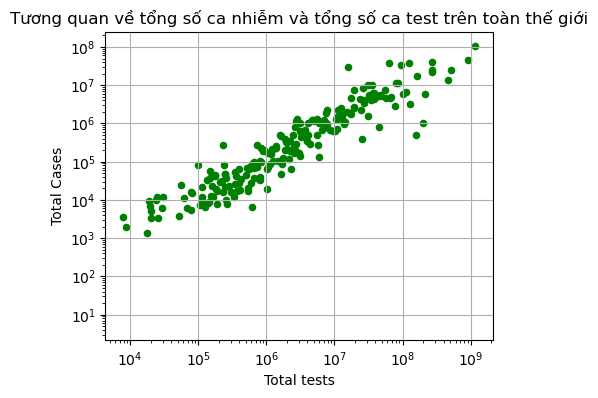

In [59]:
fig, ax = plt.subplots()
ax.set_title("Tương quan về tổng số ca nhiễm và tổng số ca test trên toàn thế giới")
covid_df[['Total Cases', 'Total tests']].plot.scatter(
    x='Total tests',
    y='Total Cases',
    ax=ax,
    color='green',
    figsize=(5, 4)
)

ax.grid()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_y_axis))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_y_axis))

plt.xscale('log')
plt.yscale('log')
plt.show()

- **Nhận xét biểu đồ**: 
  - Số ca nhiễm và số ca test gần như hồi quy, 2 trường dữ liệu này có sự tương quan với nhau khi các điểm dữ liệu tạo thành 1 đường thẳng.
  - Từ đó, ta có thể rút ra được kết luận rằng số ca test covid sẽ phụ thuộc vào số ca nhiễm covid, khi số ca nhiễm tăng thì số ca test sẽ tăng.
- **Xét trường dữ liệu liên quan**: Để tìm hiểu kỹ hơn, ta hãy theo dõi mối quan hệ giữa số ca nhiễm và số ca chết gây ra bởi dịch covid.

2. Tổng số ca chết trên toàn thế giới có phụ thuộc vào tổng số ca nhiễm hay không?

- **Trường dữ liệu được trực quan**: `Total Cases`, `Total Deaths`
- **Biểu đồ sử dụng**: Scatter plot (Biểu đồ phân tán)
- **Tính phù hợp của biểu đồ**: Để thấy được mối tương quan giữa 2 trường dữ liệu để xem rằng 2 trường dữ liệu này có mối quan hệ tác động, phụ thuộc hoặc độc lập với nhau không.
- **Mục đích của câu hỏi:** Để nắm rõ được tình hình rằng các ca nhiễm covid có ảnh hưởng như thế nào đến số ca chết được ghi nhận bởi dịch covid từ đó lường trước được mức độ rủi ro.
- **Giải thích cách làm/thuật toán**:
    - Đọc dữ liệu tình trạng covid bằng thư viện `pandas`
    - Lấy ra 2 cột dữ liệu `Total Cases` và `Total Deaths`
    - Sử dụng biểu đồ scatter để trực quan dữ liệu với trục x là `Total Deaths` và trục y là `Total Cases`
    - Cuối cùng, scale lại trục y và trục x theo hàm `log`

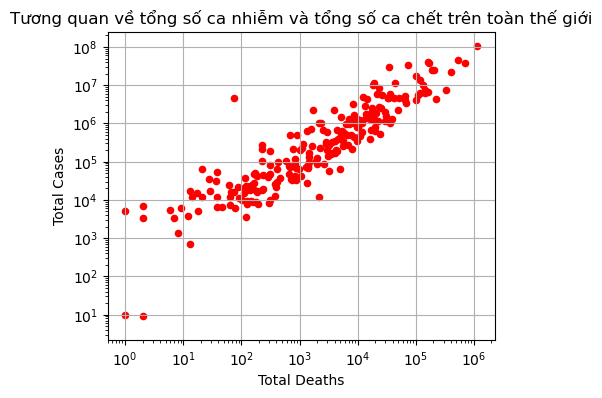

In [6]:
fig, ax = plt.subplots()
ax.set_title("Tương quan về tổng số ca nhiễm và tổng số ca chết trên toàn thế giới")
covid_df[['Total Cases', 'Total Deaths']].plot.scatter(
    x='Total Deaths',
    y='Total Cases',
    ax=ax,
    color='red',
    figsize=(5, 4)
)

ax.grid()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_y_axis))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_y_axis))

plt.xscale('log')
plt.yscale('log')
plt.show()

- **Nhận xét biểu đồ**: 
  - Kết quả cho ra khá giống với mối quan hệ giữa số ca nhiễm và số ca test khi số ca nhiễm và số ca chết cũng có mối quan hệ tương quan dương, chứng tỏ rằng 2 trường dữ liệu này khá phụ thuộc lẫn nhau
  - Bên cạnh đó, nếu để ý kĩ thì có 1 số điểm dữ liệu ngoại vi (outlier) không nằm trên đường thẳng, có 1 số quốc gia dù số ca nhiễm tăng nhưng số ca chết không nhiều (các điểm dữ liệu nằm trên đường thẳng), hoặc có 1 số quốc gia dù số ca nhiễm ít nhưng số ca chết tăng rất cao (những điểm dữ liệu nằm dưới đường thẳng)
- **Xét trường dữ liệu liên quan**: Cuối cùng, ta hãy theo dõi mối quan hệ giữa số ca nhiễm và số ca phục hồi gây ra bởi dịch covid.

3. Tổng số ca hồi phục trên toàn thế giới có phụ thuộc vào tổng số ca nhiễm hay không?

- **Trường dữ liệu được trực quan**: `Total Cases`, `Total Recovered`
- **Biểu đồ sử dụng**: Scatter plot (Biểu đồ phân tán)
- **Tính phù hợp của biểu đồ**: Để thấy được mối tương quan giữa 2 trường dữ liệu để xem rằng 2 trường dữ liệu này có mối quan hệ tác động, phụ thuộc hoặc độc lập với nhau không.
- **Mục đích của câu hỏi:** Để nắm rõ được tình hình rằng các ca nhiễm covid có ảnh hưởng như thế nào đến số ca hồi phục trên toàn thế giới để phần nào hiểu rõ được tình hình phòng chống dịch.
- **Giải thích cách làm/thuật toán**:
    - Đọc dữ liệu tình trạng covid bằng thư viện `pandas`
    - Lấy ra 2 cột dữ liệu `Total Cases` và `Total Recovered`
    - Sử dụng biểu đồ scatter để trực quan dữ liệu với trục x là `Total Recovered` và trục y là `Total Cases`
    - Cuối cùng, scale lại trục y và trục x theo hàm `log`

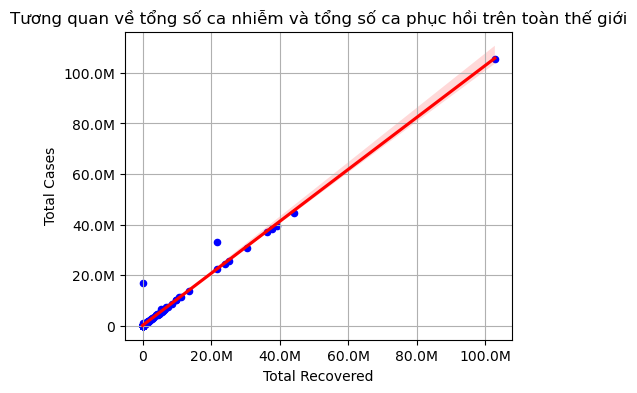

In [65]:
fig, ax = plt.subplots()
ax.set_title("Tương quan về tổng số ca nhiễm và tổng số ca phục hồi trên toàn thế giới")
covid_df[['Total Cases', 'Total Recovered']].plot.scatter(x='Total Recovered', y='Total Cases', ax=ax, color='blue', figsize=(5, 4))

ax.grid()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_y_axis))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_y_axis))

sns.regplot(x='Total Recovered', y='Total Cases', data=covid_df, ax=ax, scatter=False, color='red')

plt.show()

- **Nhận xét biểu đồ**: 
  - Mối tương quan giữa 2 trường dữ liệu này gần như phụ thuộc nhau hoàn toàn khi tất cả các điểm dữ liệu tập trung thành 1 đường thẳng, điều này cho thấy số ca nhiễm và số ca hồi phục trên toàn thế giới gần như tuyến tính với nhau.
  - Từ đó, ta hiểu được rằng cứ số ca nhiễm trên thế giới ở từng quốc gia tăng lên thì số lượng người hồi phục cũng tăng theo, cho thấy được khả năng phòng chống dịch của các quốc gia đang được nâng cao và người dân có ý thức được tinh thần chống dịch bệnh.
  - Chính vì vậy, việc xây dựng mô hình hồi quy tuyến tính sẽ giúp ta theo dõi được ngay số lượng người được hồi phục ngay tương ứng với số ca nhiễm, nhưng bên cạnh đó cũng phải dùng các phương pháp thống kê để đánh giá mô hình, đảm bảo được độ chính xác cao nhất.

4. Các quốc gia có tỉ lệ 1 ca nhiễm trên ít số người nhất:
- **Trường dữ liệu được trực quan**:  `1 Case every X ppl`
- **Biểu đồ sử dụng**: Bar chart.
- **Tính phù hợp của biểu đồ**: Để dễ dàng so sánh top 10 quốc gia có tỉ lệ 1 ca nhiễm trên ít số người nhất, bar chart là một biểu đồ phù hợp vì việc so sánh được thể hiện rõ ở chiều cao các cột tương ứng với các quốc gia (các giá trị rời rạc). 
- **Mục đích của câu hỏi:** Kiểm tra tỉ lệ nhiễm bệnh cao nhất của các quốc gia để rút ra được lý do và cảnh báo cho các quốc gia này.
- **Giải thích cách làm/thuật toán**: Loại bỏ những quốc gia có trường dữ liệu `1 Case every X ppl` bằng 0 (do không có số liệu) rồi lấy ra top 10 quốc gia có giá trị thấp nhất.

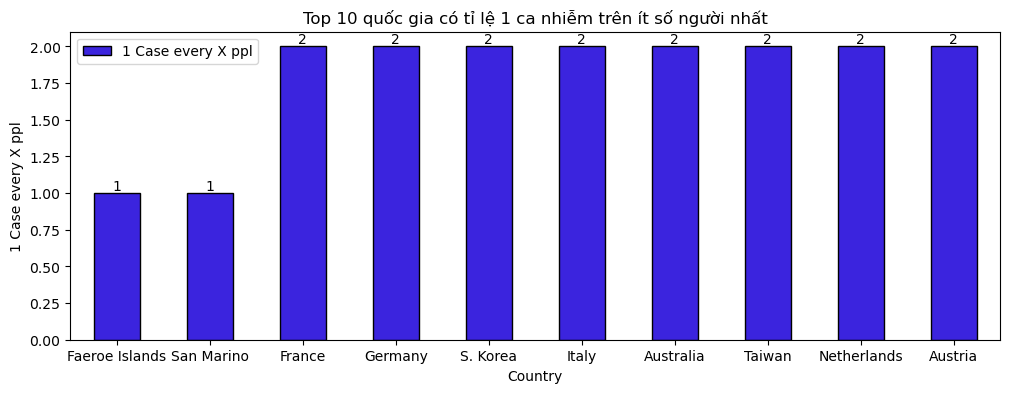

In [66]:
fig, ax = plt.subplots()
ax.set_title("Top 10 quốc gia có tỉ lệ 1 ca nhiễm trên ít số người nhất")
covid_df.drop(covid_df[covid_df['1 Case every X ppl'] == 0].index)[['Country', '1 Case every X ppl']].nsmallest(
    n=10,
    columns=['1 Case every X ppl']
).plot(
    kind="bar",
    color=(0.23, 0.14, 0.87),
    figsize=(12, 4),
    x='Country',
    xlabel="Country",
    ylabel='1 Case every X ppl',
    fontsize=10, ax=ax,
    edgecolor="black"
)

ax.bar_label(
    ax.containers[0],
    fontsize=10,
)

ax.xaxis.set_tick_params(rotation=0)
plt.show()

- **Nhận xét biểu đồ**: 
  - Faeroe Islands và San Marino là 2 quốc gia có tỉ lệ nhiễm bệnh cao nhất khi trung bình cứ 1 người thì người đó sẽ nhiễm covid.
  - Ngoài ra, các nước nằm trong top 10 tỉ lệ nhiễm bệnh cao nhất này cũng không khá hơn khi trung bình cứ 2 người thì có 1 người nhiễm covid.
  - Đặc biệt hơn, các quốc gia này là các nước phát triển và như Đức, Pháp, Hàn Quốc, Ý, ...
  - Điều này cho thấy đa số các nước phát triển sẽ có mật độ dân cư cao, dễ tập trung đông người, từ đó gây ra lây lan dịch bệnh nhanh.
  
- **Quan hệ với các trường dữ liệu khác**: Ta sẽ xem các quốc gia có tỉ lệ chết trên số người ít nhất để xem nó có mối quan hệ gì đến với tỉ lệ nhiễm bệnh hay không.

5. Top 10 quốc gia có tỉ lệ 1 ca chết trên ít số người nhất

- **Trường dữ liệu được trực quan**:  `1 Death every X ppl`
- **Biểu đồ sử dụng**: Bar chart.
- **Tính phù hợp của biểu đồ**: Để dễ dàng so sánh top 10 quốc gia có tỉ lệ 1 ca chết trên ít số người nhất, bar chart là một biểu đồ phù hợp vì việc so sánh được thể hiện rõ ở chiều cao các cột tương ứng với các quốc gia (các giá trị rời rạc). 
- **Mục đích của câu hỏi:** Kiểm tra tỉ lệ chết cao nhất để xem xét mối quan hệ với tỉ lệ nhiễm bệnh.
- **Giải thích cách làm/thuật toán**: Loại bỏ những quốc gia có trường dữ liệu `1 Death every X ppl` bằng 0 (do không có số liệu) rồi lấy ra top 10 quốc gia có giá trị thấp nhất.

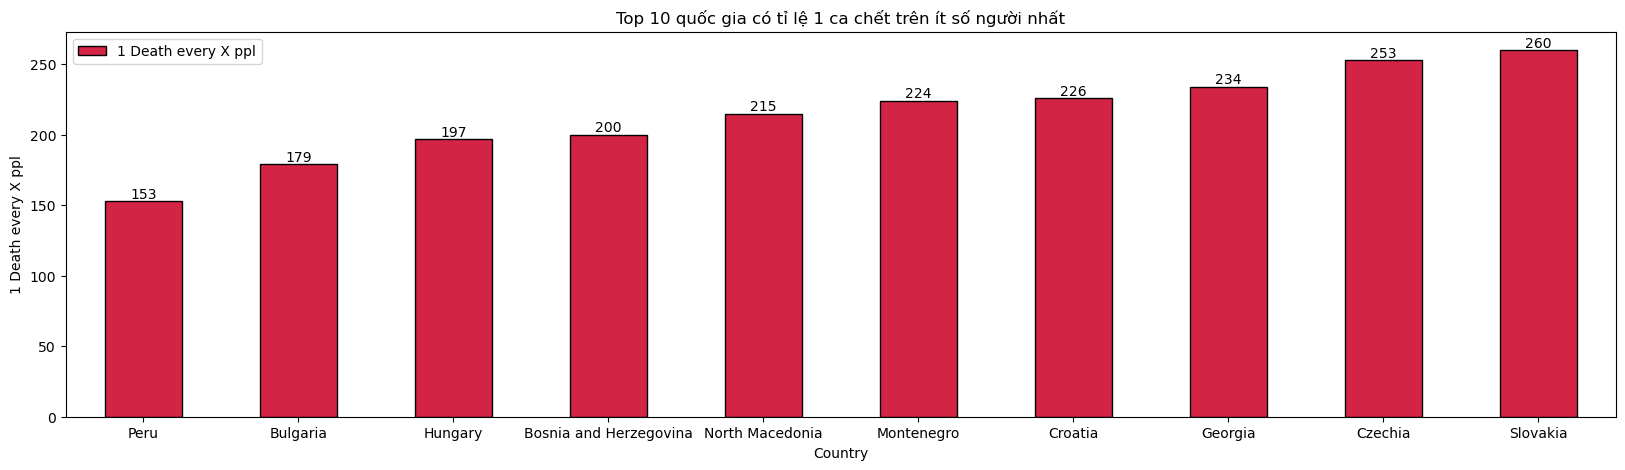

In [67]:
fig, ax = plt.subplots()
ax.set_title("Top 10 quốc gia có tỉ lệ 1 ca chết trên ít số người nhất")
covid_df.drop(covid_df[covid_df['1 Death every X ppl'] == 0].index)[['Country', '1 Death every X ppl']].nsmallest(
    n=10,
    columns=['1 Death every X ppl']
).plot(
    kind="bar",
    color=(0.83, 0.14, 0.27),
    figsize=(20, 5),
    x='Country',
    xlabel="Country",
    ylabel='1 Death every X ppl',
    fontsize=10, ax=ax,
    edgecolor="black"
)

ax.bar_label(
    ax.containers[0],
    fontsize=10,
)

ax.xaxis.set_tick_params(rotation=0)
plt.show()

- Nhận xét:
    - Từ biểu đồ, ta có thể thấy được tỉ lệ chết do covid trên số người ở các quốc gia này khá thấp, trải dài từ khoảng 150 người đến hơn 250 người.
    - Tuy nhiên, các quốc gia nằm trong top tỉ lệ chết trên số người lại không phải là các quốc gia phát triển, mà đó là các nước như Peru, Bulgaria, Montenegro,... Nhìn chung là các quốc gia đang phát triển.
    - Điều đó cho thấy được rằng các quốc gia phát triển thì sẽ có tỉ lệ mắc bệnh cao hơn nhưng ở các quốc gia kém phát triển hơn, do điều kiện phòng chống dịch chưa được tốt, nên tỉ lệ chết do covid của những quốc gia này cao hơn hẳn.

6. Số ca nhiễm, chết và hồi phục được phân bố như thế nào theo từng châu lục

- **Trường dữ liệu được trực quan**:  `Total Cases`, `Total Deaths`, `Total Recovered`
- **Biểu đồ sử dụng**: Multiple bar chart.
- **Tính phù hợp của biểu đồ**: Để có thể theo dõi được nhiều trường dữ liệu trên các châu lục cùng 1 lúc, dùng multiple bar chart để có cái nhìn tổng quan, dễ đối chiếu các số liệu với nhau
- **Mục đích của câu hỏi:** Kiểm tra tình hình phân bố số ca nhiễm, chết và hồi phục theo từng châu lục.
- **Giải thích cách làm/thuật toán**:
    - Gom nhóm các quốc gia trong cùng châu lục rồi lấy tổng số ca phục hồi.
    - Làm tương tự với tổng số ca nhiễm và tổng số ca chết bằng việc gom nhóm.
    - Sau đó ứng với từng trường dữ liệu, plot ra biểu đồ cột tương ứng với châu lục rồi show giá trị chính xác của dữ liệu cho từng cột
    - Cuối cùng, scale lại các giá trị trên trục y bằng hàm `log`

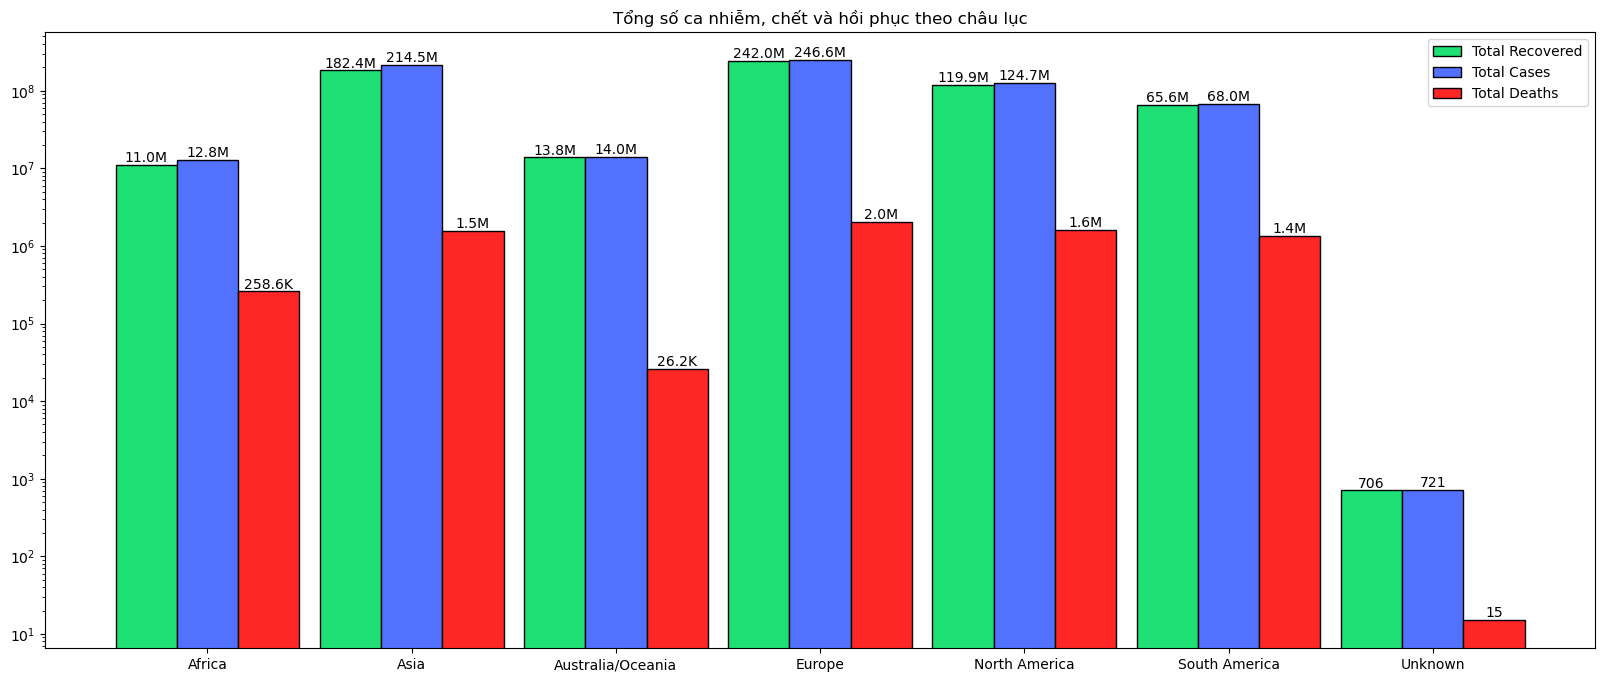

In [35]:
fig, ax = plt.subplots(1,1, figsize = (20, 8))
width = 0.3

recover = pd.DataFrame(covid_df.groupby(["Continent"])["Total Recovered"].agg(sum))
cases = pd.DataFrame(covid_df.groupby(["Continent"])["Total Cases"].agg(sum))
deaths = pd.DataFrame(covid_df.groupby(["Continent"])["Total Deaths"].agg(sum))

continent = cases["Total Cases"].keys()
x = np.arange(len(continent))
ax.set_xticks(x)
ax.set_xticklabels(continent)

ax.set_title("Tổng số ca nhiễm, chết và hồi phục theo châu lục")
rect1 = ax.bar(
    x - width,
    recover["Total Recovered"].values,
    width = width, 
    label = 'Total Recovered',
    edgecolor = "black",
    color = "#1fe074",
)

ax.bar_label(
    ax.containers[0],
    fontsize=10,
    labels=[format_y_axis(x) for x in recover["Total Recovered"].values], 
    label_type="edge",
)

rect2 = ax.bar(
    x,
    cases["Total Cases"].values,
    width = width, 
    label = 'Total Cases',
    edgecolor = "black",
    color = "#5271FF"
)

ax.bar_label(
    ax.containers[1],
    fontsize=10,
    labels=[format_y_axis(x) for x in cases["Total Cases"].values], 
    label_type="edge",
)

rect3 = ax.bar(
    x + width,
    deaths["Total Deaths"].values,
    width = width, 
    label = 'Total Deaths',
    edgecolor = "black",
    color = "#FF2626"
)

ax.bar_label(
    ax.containers[2],
    fontsize=10,
    labels=[format_y_axis(x) for x in deaths["Total Deaths"].values], 
    label_type="edge",
)

ax.legend(["Total Recovered", "Total Cases", "Total Deaths"])
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_y_axis))
plt.yscale('log')

plt.show()

- Nhận xét:
    - Từ biểu đồ, ta có thể thấy được Châu Âu, dùng là lục địa có diện tích tương đối nhỏ và số dân tương đối ít, nhưng lại cao nhất về số người mắc covid và số người chết bởi covid (với gần 247 triệu ca nhiễm và 2 triệu người chết)
    - Tuy nhiên Châu Âu cũng dẫn đầu về số người hồi phục cao nhất với 242 triệu người, mặt khác, Châu Á có số ca nhiễm cao hơn Bắc Mỹ tuy nhiên số người chết ở Châu Á lại ít hơn Bắc Mỹ (1,6 triệu người chết ở Bắc Mỹ và 1,5 triệu người chết ở Châu Á)
    - Tóm lại, biểu đồ này giúp ta có cái nhìn khách quan hơn về tình hình dịch ở từng châu lục từ đó đánh giá được tình hình phòng chống dịch covid ở mỗi châu lục.

5. Top 10 quốc gia có tỉ lệ 1 ca chết trên số người ít nhất

- **Trường dữ liệu được trực quan**:  `1 Death every X ppl`
- **Biểu đồ sử dụng**: Bar chart.
- **Tính phù hợp của biểu đồ**: Để dễ dàng so sánh top 10 quốc gia có ca mắc covid mới, bar chart là một biểu đồ phù hợp vì việc so sánh được thể hiện rõ ở chiều cao các cột tương ứng với các quốc gia (các giá trị rời rạc). 
- **Mục đích của câu hỏi:** Kiểm tra tỉ lệ chết cao nhất để xem xét mối quan hệ với tỉ lệ nhiễm bệnh.

---

# Phần report

- Hàm hỗ trợ: `format_y_axis`

![](../img/7.png)

- Ý nghĩa: Hàm này sẽ giúp chuyển đổi các giá trị lớn về dạng kí hiệu trên trục tọa độ, ví dụ 1.000.000 thành 1M, 3.000 thành 3K

1. Tổng số ca test trên toàn thế giới có mối quan hệ với tổng số ca nhiễm hay không?

- **Trường dữ liệu được trực quan**: `Total Cases`, `Total Tests`
- **Biểu đồ sử dụng**: Scatter plot (Biểu đồ phân tán)
- **Tính phù hợp của biểu đồ**: Để thấy được mối tương quan giữa 2 trường dữ liệu để xem rằng 2 trường dữ liệu này có mối quan hệ tác động, phụ thuộc hoặc độc lập với nhau không.
- **Mục đích của câu hỏi:** Để nắm rõ được tình hình các ca test trên thế giới được phân bố như thế nào trước tổng số ca nhiễm trên mỗi quốc gia.
- **Giải thích cách làm/thuật toán**:
    - Đọc dữ liệu tình trạng covid bằng thư viện `pandas`
    - Lấy ra 2 cột dữ liệu `Total Cases` và `Total Tests`
    - Sử dụng biểu đồ scatter để trực quan dữ liệu với trục x là `Total Tests` và trục y là `Total Cases`
    - Cuối cùng, scale lại trục y và trục x theo hàm `log`

![](../img/8.png)

![](../img/1.png)

- **Nhận xét biểu đồ**: 
  - Số ca nhiễm và số ca test gần như hồi quy, 2 trường dữ liệu này có sự tương quan với nhau khi các điểm dữ liệu tạo thành 1 đường thẳng.
  - Từ đó, ta có thể rút ra được kết luận rằng số ca test covid sẽ phụ thuộc vào số ca nhiễm covid, khi số ca nhiễm tăng thì số ca test sẽ tăng.
- **Xét trường dữ liệu liên quan**: Để tìm hiểu kỹ hơn, ta hãy theo dõi mối quan hệ giữa số ca nhiễm và số ca chết gây ra bởi dịch covid.

2. Tổng số ca chết trên toàn thế giới có phụ thuộc vào tổng số ca nhiễm hay không?

- **Trường dữ liệu được trực quan**: `Total Cases`, `Total Deaths`
- **Biểu đồ sử dụng**: Scatter plot (Biểu đồ phân tán)
- **Tính phù hợp của biểu đồ**: Để thấy được mối tương quan giữa 2 trường dữ liệu để xem rằng 2 trường dữ liệu này có mối quan hệ tác động, phụ thuộc hoặc độc lập với nhau không.
- **Mục đích của câu hỏi:** Để nắm rõ được tình hình rằng các ca nhiễm covid có ảnh hưởng như thế nào đến số ca chết được ghi nhận bởi dịch covid từ đó lường trước được mức độ rủi ro.
- **Giải thích cách làm/thuật toán**:
    - Đọc dữ liệu tình trạng covid bằng thư viện `pandas`
    - Lấy ra 2 cột dữ liệu `Total Cases` và `Total Deaths`
    - Sử dụng biểu đồ scatter để trực quan dữ liệu với trục x là `Total Deaths` và trục y là `Total Cases`
    - Cuối cùng, scale lại trục y và trục x theo hàm `log`

![](../img/2.png)

- **Nhận xét biểu đồ**: 
  - Kết quả cho ra khá giống với mối quan hệ giữa số ca nhiễm và số ca test khi số ca nhiễm và số ca chết cũng có mối quan hệ tương quan dương, chứng tỏ rằng 2 trường dữ liệu này khá phụ thuộc lẫn nhau
  - Bên cạnh đó, nếu để ý kĩ thì có 1 số điểm dữ liệu ngoại vi (outlier) không nằm trên đường thẳng, có 1 số quốc gia dù số ca nhiễm tăng nhưng số ca chết không nhiều (các điểm dữ liệu nằm trên đường thẳng), hoặc có 1 số quốc gia dù số ca nhiễm ít nhưng số ca chết tăng rất cao (những điểm dữ liệu nằm dưới đường thẳng)
- **Xét trường dữ liệu liên quan**: Cuối cùng, ta hãy theo dõi mối quan hệ giữa số ca nhiễm và số ca phục hồi gây ra bởi dịch covid.

3. Tổng số ca hồi phục trên toàn thế giới có phụ thuộc vào tổng số ca nhiễm hay không?

- **Trường dữ liệu được trực quan**: `Total Cases`, `Total Recovered`
- **Biểu đồ sử dụng**: Scatter plot (Biểu đồ phân tán)
- **Tính phù hợp của biểu đồ**: Để thấy được mối tương quan giữa 2 trường dữ liệu để xem rằng 2 trường dữ liệu này có mối quan hệ tác động, phụ thuộc hoặc độc lập với nhau không.
- **Mục đích của câu hỏi:** Để nắm rõ được tình hình rằng các ca nhiễm covid có ảnh hưởng như thế nào đến số ca hồi phục trên toàn thế giới để phần nào hiểu rõ được tình hình phòng chống dịch.
- **Giải thích cách làm/thuật toán**:
    - Đọc dữ liệu tình trạng covid bằng thư viện `pandas`
    - Lấy ra 2 cột dữ liệu `Total Cases` và `Total Recovered`
    - Sử dụng biểu đồ scatter để trực quan dữ liệu với trục x là `Total Recovered` và trục y là `Total Cases`
    - Cuối cùng, scale lại trục y và trục x theo hàm `log`

![](../img/3.png)

- Ở biểu đồ này, để vẽ được thêm đường hồi quy, ta dùng hàm `regplot` của seaborn:

![](../img/9.png)

- **Nhận xét biểu đồ**: 
  - Mối tương quan giữa 2 trường dữ liệu này gần như phụ thuộc nhau hoàn toàn khi tất cả các điểm dữ liệu tập trung thành 1 đường thẳng, điều này cho thấy số ca nhiễm và số ca hồi phục trên toàn thế giới gần như tuyến tính với nhau.
  - Từ đó, ta hiểu được rằng cứ số ca nhiễm trên thế giới ở từng quốc gia tăng lên thì số lượng người hồi phục cũng tăng theo, cho thấy được khả năng phòng chống dịch của các quốc gia đang được nâng cao và người dân có ý thức được tinh thần chống dịch bệnh.
  - Chính vì vậy, việc xây dựng mô hình hồi quy tuyến tính sẽ giúp ta theo dõi được ngay số lượng người được hồi phục ngay tương ứng với số ca nhiễm, nhưng bên cạnh đó cũng phải dùng các phương pháp thống kê để đánh giá mô hình, đảm bảo được độ chính xác cao nhất.

4. Các quốc gia có tỉ lệ 1 ca nhiễm trên ít số người nhất:
- **Trường dữ liệu được trực quan**:  `1 Case every X ppl`
- **Biểu đồ sử dụng**: Bar chart.
- **Tính phù hợp của biểu đồ**: Để dễ dàng so sánh top 10 quốc gia có tỉ lệ 1 ca nhiễm trên ít số người nhất, bar chart là một biểu đồ phù hợp vì việc so sánh được thể hiện rõ ở chiều cao các cột tương ứng với các quốc gia (các giá trị rời rạc). 
- **Mục đích của câu hỏi:** Kiểm tra tỉ lệ nhiễm bệnh cao nhất của các quốc gia để rút ra được lý do và cảnh báo cho các quốc gia này.
- **Giải thích cách làm/thuật toán**: Loại bỏ những quốc gia có trường dữ liệu `1 Case every X ppl` bằng 0 (do không có số liệu) rồi lấy ra top 10 quốc gia có giá trị thấp nhất.

![](../img/10.png)

![](../img/4.png)

- **Nhận xét biểu đồ**: 
  - Faeroe Islands và San Marino là 2 quốc gia có tỉ lệ nhiễm bệnh cao nhất khi trung bình cứ 1 người thì người đó sẽ nhiễm covid.
  - Ngoài ra, các nước nằm trong top 10 tỉ lệ nhiễm bệnh cao nhất này cũng không khá hơn khi trung bình cứ 2 người thì có 1 người nhiễm covid.
  - Đặc biệt hơn, các quốc gia này là các nước phát triển và như Đức, Pháp, Hàn Quốc, Ý, ...
  - Điều này cho thấy đa số các nước phát triển sẽ có mật độ dân cư cao, dễ tập trung đông người, từ đó gây ra lây lan dịch bệnh nhanh.
  
- **Quan hệ với các trường dữ liệu khác**: Ta sẽ xem các quốc gia có tỉ lệ chết trên số người ít nhất để xem nó có mối quan hệ gì đến với tỉ lệ nhiễm bệnh hay không.

5. Top 10 quốc gia có tỉ lệ 1 ca chết trên ít số người nhất

- **Trường dữ liệu được trực quan**:  `1 Death every X ppl`
- **Biểu đồ sử dụng**: Bar chart.
- **Tính phù hợp của biểu đồ**: Để dễ dàng so sánh top 10 quốc gia có tỉ lệ 1 ca chết trên ít số người nhất, bar chart là một biểu đồ phù hợp vì việc so sánh được thể hiện rõ ở chiều cao các cột tương ứng với các quốc gia (các giá trị rời rạc). 
- **Mục đích của câu hỏi:** Kiểm tra tỉ lệ chết cao nhất để xem xét mối quan hệ với tỉ lệ nhiễm bệnh.
- **Giải thích cách làm/thuật toán**: Loại bỏ những quốc gia có trường dữ liệu `1 Death every X ppl` bằng 0 (do không có số liệu) rồi lấy ra top 10 quốc gia có giá trị thấp nhất.

![](../img/5.png)

- **Nhận xét biểu đồ**:
    - Từ biểu đồ, ta có thể thấy được tỉ lệ chết do covid trên số người ở các quốc gia này khá thấp, trải dài từ khoảng 150 người đến hơn 250 người.
    - Tuy nhiên, các quốc gia nằm trong top tỉ lệ chết trên số người lại không phải là các quốc gia phát triển, mà đó là các nước như Peru, Bulgaria, Montenegro,... Nhìn chung là các quốc gia đang phát triển.
    - Điều đó cho thấy được rằng các quốc gia phát triển thì sẽ có tỉ lệ mắc bệnh cao hơn nhưng ở các quốc gia kém phát triển hơn, do điều kiện phòng chống dịch chưa được tốt, nên tỉ lệ chết do covid của những quốc gia này cao hơn hẳn.

6. Số ca nhiễm, chết và hồi phục được phân bố như thế nào theo từng châu lục

- **Trường dữ liệu được trực quan**:  `Total Cases`, `Total Deaths`, `Total Recovered`
- **Biểu đồ sử dụng**: Multiple bar chart.
- **Tính phù hợp của biểu đồ**: Để có thể theo dõi được nhiều trường dữ liệu trên các châu lục cùng 1 lúc, dùng multiple bar chart để có cái nhìn tổng quan, dễ đối chiếu các số liệu với nhau
- **Mục đích của câu hỏi:** Kiểm tra tình hình phân bố số ca nhiễm, chết và hồi phục theo từng châu lục.
- **Giải thích cách làm/thuật toán**:
    - Gom nhóm các quốc gia trong cùng châu lục rồi lấy tổng số ca phục hồi.
    - Làm tương tự với tổng số ca nhiễm và tổng số ca chết bằng việc gom nhóm.
    - Sau đó ứng với từng trường dữ liệu, plot ra biểu đồ cột tương ứng với châu lục rồi show giá trị chính xác của dữ liệu cho từng cột
    - Cuối cùng, scale lại các giá trị trên trục y bằng hàm `log`

![](../img/11.png)

- Để scale các giá trị lại trên trục y thì ta dùng hàm `yscale` và scale theo hàm `log`:

![](../img/12.png)

- Cuối cùng ta được biểu đồ như sau:

![](../img/6.png)

- **Nhận xét biểu đồ**:
    - Từ biểu đồ, ta có thể thấy được Châu Âu, dùng là lục địa có diện tích tương đối nhỏ và số dân tương đối ít, nhưng lại cao nhất về số người mắc covid và số người chết bởi covid (với gần 247 triệu ca nhiễm và 2 triệu người chết)
    - Tuy nhiên Châu Âu cũng dẫn đầu về số người hồi phục cao nhất với 242 triệu người, mặt khác, Châu Á có số ca nhiễm cao hơn Bắc Mỹ tuy nhiên số người chết ở Châu Á lại ít hơn Bắc Mỹ (1,6 triệu người chết ở Bắc Mỹ và 1,5 triệu người chết ở Châu Á)
    - Tóm lại, biểu đồ này giúp ta có cái nhìn khách quan hơn về tình hình dịch ở từng châu lục từ đó đánh giá được tình hình phòng chống dịch covid ở mỗi châu lục.